In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from scipy.stats import beta
import plot

In [2]:
df = pd.read_csv("simulación_multiples_n.csv")
df = df.drop('Unnamed: 0', axis=1)
df

,sim_name,method,expected_theta,theta_prom,error,est_theta_list,room.t60,mic_array.d,mic_array.n,mic_array.position,source.position
0,"sim_T0.20s_d0.1_n3_s[5.0,2.0,1.0]_m[5.0,7.0,1.0,]",Classic,88.282,93.075,0.00071,"[0.0, 94.1, 92.05]",0.2,0.1,3,"[5, 2, 1]","[5, 7, 1]"
1,"sim_T0.20s_d0.1_n3_s[5.0,2.0,1.0]_m[5.0,7.0,1.0,]",ROTH,88.282,93.075,0.00071,"[0.0, 94.1, 92.05]",0.2,0.1,3,"[5, 2, 1]","[5, 7, 1]"
2,"sim_T0.20s_d0.1_n3_s[5.0,2.0,1.0]_m[5.0,7.0,1.0,]",PHAT,88.282,93.075,0.00071,"[0.0, 94.1, 92.05]",0.2,0.1,3,"[5, 2, 1]","[5, 7, 1]"
3,"sim_T0.20s_d0.1_n3_s[5.0,2.0,1.0]_m[5.0,7.0,1.0,]",SCOT,88.282,93.075,0.00071,"[0.0, 94.1, 92.05]",0.2,0.1,3,"[5, 2, 1]","[5, 7, 1]"
4,"sim_T0.20s_d0.1_n3_s[5.0,2.0,1.0]_m[5.0,7.0,1.0,]",ECKART,88.282,93.075,0.00071,"[0.0, 94.1, 92.05]",0.2,0.1,3,"[5, 2, 1]","[5, 7, 1]"
...,...,...,...,...,...,...,...,...,...,...,...
19795,"sim_T0.80s_d0.6_n7_s[6.0,3.0,1.0]_m[8.0,3.0,1.0,]",ROTH,0.000,31.828,0.03127,"[0.0, 69.79, 0.0, 0.0, 62.52, 0.0, 58.66]",0.8,0.6,7,"[6, 3, 1]","[8, 3, 1]"
19796,"sim_T0.80s_d0.6_n7_s[6.0,3.0,1.0]_m[8.0,3.0,1.0,]",PHAT,0.000,21.647,0.01446,"[0.0, 8.7, 0.0, 0.0, 62.52, 0.0, 58.66]",0.8,0.6,7,"[6, 3, 1]","[8, 3, 1]"
19797,"sim_T0.80s_d0.6_n7_s[6.0,3.0,1.0]_m[8.0,3.0,1.0,]",SCOT,0.000,21.647,0.01446,"[0.0, 8.7, 0.0, 0.0, 62.52, 0.0, 58.66]",0.8,0.6,7,"[6, 3, 1]","[8, 3, 1]"
19798,"sim_T0.80s_d0.6_n7_s[6.0,3.0,1.0]_m[8.0,3.0,1.0,]",ECKART,0.000,49.748,0.07639,"[0.0, 64.61, 53.88, 180.0, 0.0, 0.0, 0.0]",0.8,0.6,7,"[6, 3, 1]","[8, 3, 1]"


In [3]:
n_mics = df.groupby("mic_array.n")["error"]
d_mics = df.groupby("mic_array.d")["error"]
d_n_mics = df.groupby(["mic_array.d", "mic_array.n"])["error"]

n_mics_means, n_mics_std = n_mics.mean(), n_mics.std()
d_mics_means, d_mics_std = d_mics.mean(), d_mics.std()
d_n_mics_means, d_n_mics_std = d_n_mics.mean(), d_n_mics.std()

In [4]:
print(n_mics_means)
print(n_mics_std)

mic_array.n
3    0.060854
4    0.048737
5    0.044543
6    0.041499
7    0.036305
Name: error, dtype: float64
mic_array.n
3    0.127643
4    0.096556
5    0.085413
6    0.076617
7    0.061078
Name: error, dtype: float64


In [5]:
print(d_mics_means)
print(d_mics_std)

mic_array.d
0.1    0.051518
0.2    0.061662
0.3    0.042096
0.4    0.048064
0.5    0.035656
0.6    0.038789
Name: error, dtype: float64
mic_array.d
0.1    0.099050
0.2    0.129378
0.3    0.081570
0.4    0.102099
0.5    0.065629
0.6    0.052561
Name: error, dtype: float64


C:\Users\joaqo\AppData\Local\Temp\ipykernel_26396\569064462.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


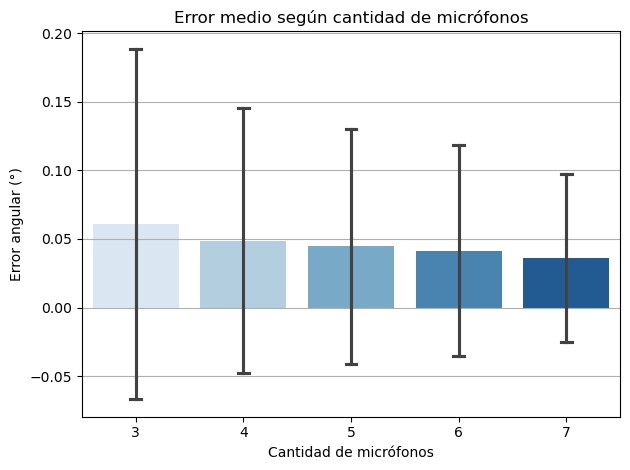

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(
    data=df,
    x="mic_array.n",
    y="error",
    errorbar="sd",   # usa la desviación estándar como barra de error
    capsize=0.1,
    palette="Blues"
)
plt.title("Error medio según cantidad de micrófonos")
plt.xlabel("Cantidad de micrófonos")
plt.ylabel("Error angular (°)")
plt.grid(axis="y")
plt.tight_layout()
plt.show()

C:\Users\joaqo\AppData\Local\Temp\ipykernel_26396\2968618268.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


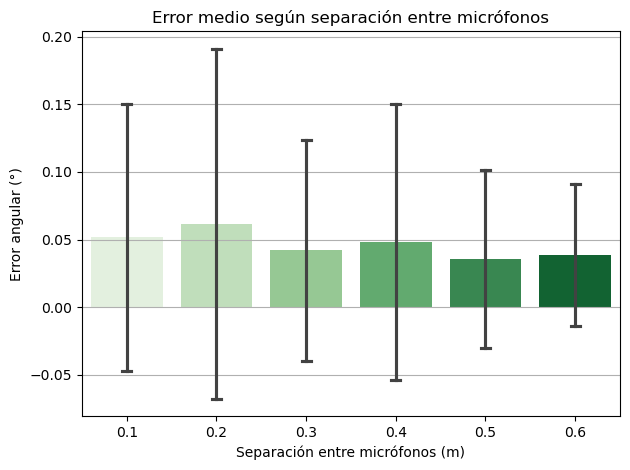

In [7]:
sns.barplot(
    data=df,
    x="mic_array.d",
    y="error",
    errorbar="sd",
    capsize=0.1,
    palette="Greens"
)
plt.title("Error medio según separación entre micrófonos")
plt.xlabel("Separación entre micrófonos (m)")
plt.ylabel("Error angular (°)")
plt.grid(axis="y")
plt.tight_layout()
plt.show()

In [8]:

def plot_error_vs_distance(df):
    """
    Grafica el error medio en función de la distancia entre micrófonos,
    separando curvas según la cantidad de micrófonos.
    """
    # Agrupar por n_mics y d_mics, y calcular la media del error
    grouped = df.groupby(["mic_array.n", "mic_array.d"])["error"].mean().reset_index()
    grouped.columns = ["n_mics", "d_mics", "error"]

    # Convertir tipos si fuera necesario
    grouped["n_mics"] = grouped["n_mics"].astype(int)
    grouped["d_mics"] = grouped["d_mics"].astype(float)

    # Graficar
    plt.figure(figsize=(10, 6))
    sns.lineplot(data=grouped, x="d_mics", y="error", hue="n_mics", marker="o", palette="hls")

    plt.xlabel("Distancia entre micrófonos (m)")
    plt.ylabel("Error medio (°)")
    plt.title("Error medio vs distancia entre micrófonos")
    plt.grid(True)
    plt.legend(title="Cantidad de micrófonos")
    plt.tight_layout()
    plt.show()

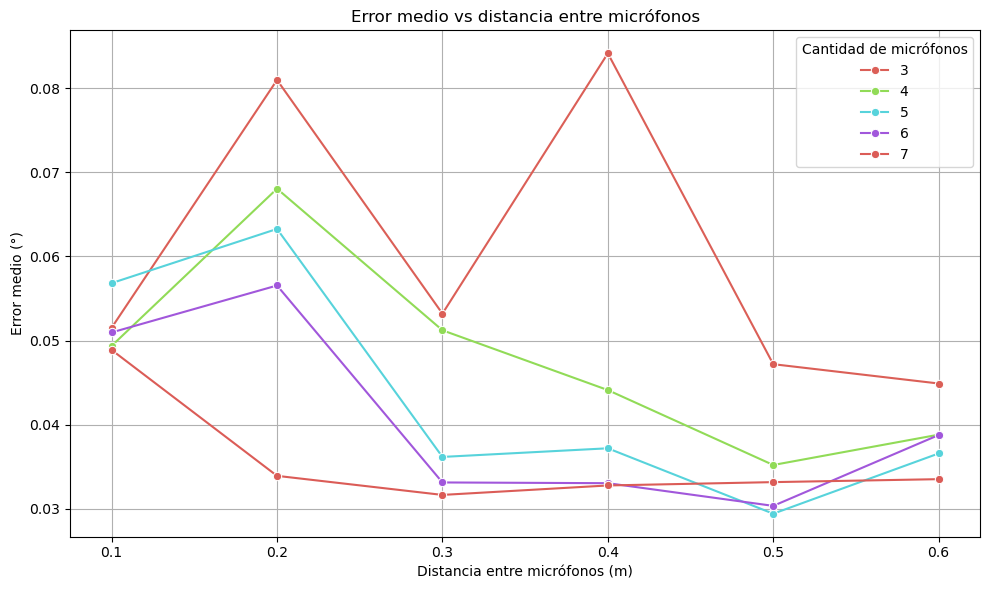

In [9]:
plot_error_vs_distance(df)

_______________________________________________________

In [10]:
df = df[df["error"] != 1.0]

n_mics = df.groupby("mic_array.n")["error"]
d_mics = df.groupby("mic_array.d")["error"]
d_n_mics = df.groupby(["mic_array.d", "mic_array.n"])["error"]

n_mics_means, n_mics_std = n_mics.mean(), n_mics.std()
d_mics_means, d_mics_std = d_mics.mean(), d_mics.std()
d_n_mics_means, d_n_mics_std = d_n_mics.mean(), d_n_mics.std()

In [11]:
print(len(n_mics.apply(list).loc[3]))

4341


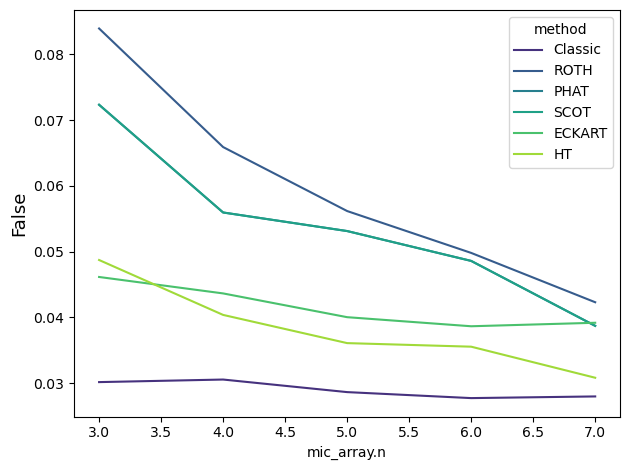

In [13]:
plot.plot_lines_error(df, "mic_array.n", "error", hue="method")